In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_datasets as tfds

https://www.tensorflow.org/datasets/catalog/svhn_cropped


In [3]:
ds, info = tfds.load('svhn_cropped',with_info=True)

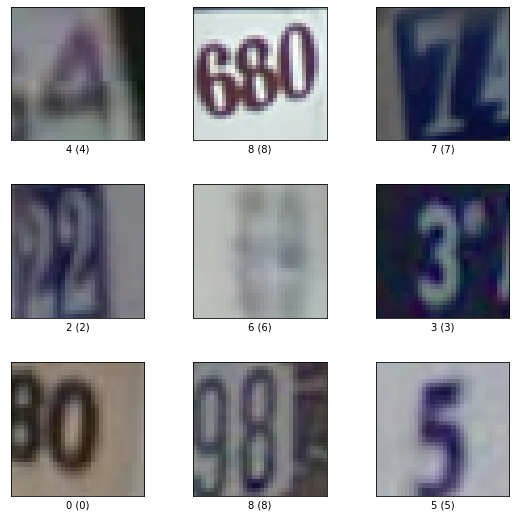

In [4]:
fig = tfds.show_examples(ds['train'],info)

In [5]:
image,label = tfds.as_numpy(tfds.load(
    'svhn_cropped',
    split='all',
    batch_size=-1,
    as_supervised=True
))

print(type(image),image.shape,label.shape)

<class 'numpy.ndarray'> (630420, 32, 32, 3) (630420,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image,label, test_size=0.25, random_state=42)

In [4]:
X_train = X_train/255
X_test = X_test/255

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [8]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(472815, 32, 32, 3) (472815, 10)
(157605, 32, 32, 3) (157605, 10)


In [6]:
Model_1 = tf.keras.Sequential()
Model_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=( 32, 32, 3),activation='relu',kernel_initializer='he_uniform',)) 
Model_1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.BatchNormalization())
Model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_1.add(tf.keras.layers.Flatten())
Model_1.add(tf.keras.layers.Dense(150,activation='relu'))
Model_1.add(tf.keras.layers.Dropout((0.5)))
Model_1.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4128      
                                                                 
 batch_normalization (BatchN  (None, 29, 29, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        1

In [8]:
Model_1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
Model_1.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
14776/14776 [==============================] - 80s 5ms/step - loss: 0.3351 - accuracy: 0.9012 - val_loss: 0.1748 - val_accuracy: 0.9506
Epoch 2/15
14776/14776 [==============================] - 68s 5ms/step - loss: 0.1873 - accuracy: 0.9481 - val_loss: 0.1551 - val_accuracy: 0.9578
Epoch 3/15
14776/14776 [==============================] - 69s 5ms/step - loss: 0.1566 - accuracy: 0.9572 - val_loss: 0.1250 - val_accuracy: 0.9662
Epoch 4/15
14776/14776 [==============================] - 69s 5ms/step - loss: 0.1396 - accuracy: 0.9620 - val_loss: 0.1303 - val_accuracy: 0.9660
Epoch 5/15
14776/14776 [==============================] - 68s 5ms/step - loss: 0.1305 - accuracy: 0.9650 - val_loss: 0.1452 - val_accuracy: 0.9621
Epoch 6/15
14776/14776 [==============================] - 68s 5ms/step - loss: 0.1237 - accuracy: 0.9665 - val_loss: 0.1300 - val_accuracy: 0.9686
Epoch 7/15
14776/14776 [==============================] - 69s 5ms/step - loss: 0.1185 - accuracy: 0.9681 - val_loss: 0

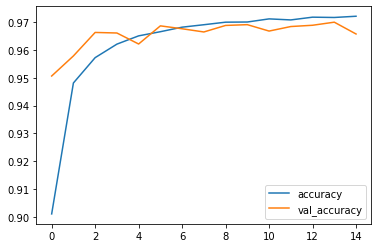

In [10]:
losse = pd.DataFrame(Model_1.history.history)
losse[['accuracy','val_accuracy']].plot()

In [19]:
Model_2 = tf.keras.Sequential()
Model_2.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=( 32, 32, 3),activation='relu',kernel_initializer='he_uniform',)) 
Model_2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.BatchNormalization())
Model_2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_2.add(tf.keras.layers.Flatten())
Model_2.add(tf.keras.layers.Dense(100,activation='relu'))
Model_2.add(tf.keras.layers.Dropout((0.5)))
Model_2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [20]:
Model_2.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
Model_2.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
14776/14776 [==============================] - 72s 5ms/step - loss: 0.4669 - accuracy: 0.8517 - val_loss: 0.1719 - val_accuracy: 0.9516
Epoch 2/15
14776/14776 [==============================] - 71s 5ms/step - loss: 0.2153 - accuracy: 0.9401 - val_loss: 0.1458 - val_accuracy: 0.9616
Epoch 3/15
14776/14776 [==============================] - 71s 5ms/step - loss: 0.1729 - accuracy: 0.9529 - val_loss: 0.1398 - val_accuracy: 0.9619
Epoch 4/15
14776/14776 [==============================] - 72s 5ms/step - loss: 0.1533 - accuracy: 0.9586 - val_loss: 0.1312 - val_accuracy: 0.9646
Epoch 5/15
14776/14776 [==============================] - 71s 5ms/step - loss: 0.1413 - accuracy: 0.9619 - val_loss: 0.1263 - val_accuracy: 0.9669
Epoch 6/15
14776/14776 [==============================] - 71s 5ms/step - loss: 0.1329 - accuracy: 0.9644 - val_loss: 0.1259 - val_accuracy: 0.9695
Epoch 7/15
14776/14776 [==============================] - 71s 5ms/step - loss: 0.1271 - accuracy: 0.9657 - val_loss: 0

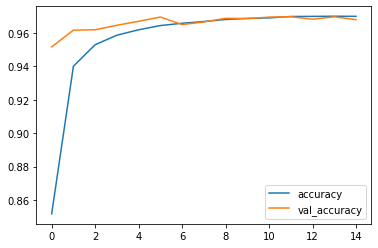

In [22]:
losse = pd.DataFrame(Model_2.history.history)
losse[['accuracy','val_accuracy']].plot()

In [9]:
Model_3 = tf.keras.Sequential()
Model_3.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=( 32, 32, 3),activation='relu',kernel_initializer='he_uniform',)) 
Model_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.BatchNormalization())
Model_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_3.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',kernel_initializer='he_uniform',))
Model_3.add(tf.keras.layers.Flatten())
Model_3.add(tf.keras.layers.Dense(100,activation='relu'))
Model_3.add(tf.keras.layers.Dropout((0.5)))
Model_3.add(tf.keras.layers.Dense(10,activation='softmax'))

In [10]:
Model_3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
Model_3.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
14776/14776 [==============================] - 96s 6ms/step - loss: 0.4303 - accuracy: 0.8667 - val_loss: 0.1674 - val_accuracy: 0.9536
Epoch 2/15
14776/14776 [==============================] - 85s 6ms/step - loss: 0.2021 - accuracy: 0.9460 - val_loss: 0.1556 - val_accuracy: 0.9582
Epoch 3/15
14776/14776 [==============================] - 86s 6ms/step - loss: 0.1659 - accuracy: 0.9563 - val_loss: 0.1509 - val_accuracy: 0.9602
Epoch 4/15
14776/14776 [==============================] - 85s 6ms/step - loss: 0.1471 - accuracy: 0.9616 - val_loss: 0.1261 - val_accuracy: 0.9657
Epoch 5/15
14776/14776 [==============================] - 86s 6ms/step - loss: 0.1363 - accuracy: 0.9646 - val_loss: 0.1274 - val_accuracy: 0.9665
Epoch 6/15
14776/14776 [==============================] - 86s 6ms/step - loss: 0.1303 - accuracy: 0.9658 - val_loss: 0.1282 - val_accuracy: 0.9677
Epoch 7/15
14776/14776 [==============================] - 85s 6ms/step - loss: 0.1265 - accuracy: 0.9672 - val_loss: 0

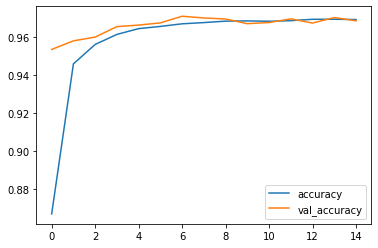

In [13]:
losse = pd.DataFrame(Model_3.history.history)
losse[['accuracy','val_accuracy']].plot()

In [17]:
Model_4 = tf.keras.Sequential()
Model_4.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),input_shape=( 32, 32, 3),activation='relu',kernel_initializer='he_uniform',)) 
Model_4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_4.add(tf.keras.layers.BatchNormalization())
Model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_4.add(tf.keras.layers.BatchNormalization())
Model_4.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
Model_4.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',))
Model_4.add(tf.keras.layers.Flatten())
Model_4.add(tf.keras.layers.Dense(50,activation='relu'))
Model_4.add(tf.keras.layers.Dropout((0.5)))
Model_4.add(tf.keras.layers.Dense(10,activation='softmax'))

In [18]:
Model_4.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
Model_4.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Epoch 1/15
14776/14776 [==============================] - 90s 6ms/step - loss: 0.3451 - accuracy: 0.9014 - val_loss: 0.1643 - val_accuracy: 0.9546
Epoch 2/15
14776/14776 [==============================] - 88s 6ms/step - loss: 0.1750 - accuracy: 0.9567 - val_loss: 0.1398 - val_accuracy: 0.9636
Epoch 3/15
14776/14776 [==============================] - 88s 6ms/step - loss: 0.1475 - accuracy: 0.9644 - val_loss: 0.1297 - val_accuracy: 0.9668
Epoch 4/15
14776/14776 [==============================] - 88s 6ms/step - loss: 0.1309 - accuracy: 0.9686 - val_loss: 0.1261 - val_accuracy: 0.9672
Epoch 5/15
14776/14776 [==============================] - 88s 6ms/step - loss: 0.1212 - accuracy: 0.9711 - val_loss: 0.1061 - val_accuracy: 0.9738
Epoch 6/15
14776/14776 [==============================] - 88s 6ms/step - loss: 0.1132 - accuracy: 0.9733 - val_loss: 0.1073 - val_accuracy: 0.9734
Epoch 7/15
14776/14776 [==============================] - 88s 6ms/step - loss: 0.1063 - accuracy: 0.9750 - val_loss: 0

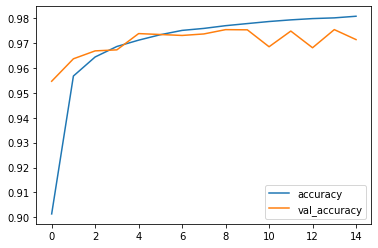

In [25]:
losse = pd.DataFrame(Model_4.history.history)
losse[['accuracy','val_accuracy']].plot()